In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import os

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
#Set data sets path here
data_path = ['data']

# Import the data using the file path
dataset = ['Animated-TV-Shows-Final.csv']
data = os.sep.join(data_path + dataset)

# Import data
df = pd.read_csv(data)

df.head()

,Unique ID,TV Show Title,IMDB Rating,Start Year,End Year,TV Rating,Episode Run Time (min),Top Genres,Total Occ
0,tt2861424,Rick and Morty,9.2,2013,,TV-14,23,"[' Adventure', ' Comedy']",2.0
1,tt13616990,Chainsaw Man,9.1,2022,,TV-MA,NaN,"[' Action', ' Adventure']",NaN
2,tt12590266,Cyberpunk: Edgerunners,8.4,2022,,TV-MA,24,"[' Action', ' Adventure']",NaN
3,tt14986406,Bleach: Thousand-Year Blood War,9.6,2022,,TV-MA,24,"[' Action', ' Adventure']",NaN
4,tt0096697,The Simpsons,8.7,1989,,TV-14,22,[' Comedy'],5.0


In [3]:
df['Total Occ'] = df['Total Occ'].fillna(0)
df['Episode Run Time (min)'] = df['Episode Run Time (min)'].fillna(0)

df.head()

,Unique ID,TV Show Title,IMDB Rating,Start Year,End Year,TV Rating,Episode Run Time (min),Top Genres,Total Occ
0,tt2861424,Rick and Morty,9.2,2013,,TV-14,23,"[' Adventure', ' Comedy']",2.0
1,tt13616990,Chainsaw Man,9.1,2022,,TV-MA,0,"[' Action', ' Adventure']",0.0
2,tt12590266,Cyberpunk: Edgerunners,8.4,2022,,TV-MA,24,"[' Action', ' Adventure']",0.0
3,tt14986406,Bleach: Thousand-Year Blood War,9.6,2022,,TV-MA,24,"[' Action', ' Adventure']",0.0
4,tt0096697,The Simpsons,8.7,1989,,TV-14,22,[' Comedy'],5.0


In [4]:
df['Top Genres'] = df['Top Genres'].str.replace(r"\[","")
df['Top Genres'] = df['Top Genres'].str.replace(r"\]","")

df.head()

C:\Users\SIU855580621\AppData\Local\Temp\ipykernel_20488\321753259.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Top Genres'] = df['Top Genres'].str.replace(r"\[","")
C:\Users\SIU855580621\AppData\Local\Temp\ipykernel_20488\321753259.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Top Genres'] = df['Top Genres'].str.replace(r"\]","")


,Unique ID,TV Show Title,IMDB Rating,Start Year,End Year,TV Rating,Episode Run Time (min),Top Genres,Total Occ
0,tt2861424,Rick and Morty,9.2,2013,,TV-14,23,"' Adventure', ' Comedy'",2.0
1,tt13616990,Chainsaw Man,9.1,2022,,TV-MA,0,"' Action', ' Adventure'",0.0
2,tt12590266,Cyberpunk: Edgerunners,8.4,2022,,TV-MA,24,"' Action', ' Adventure'",0.0
3,tt14986406,Bleach: Thousand-Year Blood War,9.6,2022,,TV-MA,24,"' Action', ' Adventure'",0.0
4,tt0096697,The Simpsons,8.7,1989,,TV-14,22,' Comedy',5.0


In [5]:
df[['Top Genre', 'Secondary Genre']] = df['Top Genres'].str.split(',', expand=True)

del df['Top Genres']

df.head()

,Unique ID,TV Show Title,IMDB Rating,Start Year,End Year,TV Rating,Episode Run Time (min),Total Occ,Top Genre,Secondary Genre
0,tt2861424,Rick and Morty,9.2,2013,,TV-14,23,2.0,' Adventure',' Comedy'
1,tt13616990,Chainsaw Man,9.1,2022,,TV-MA,0,0.0,' Action',' Adventure'
2,tt12590266,Cyberpunk: Edgerunners,8.4,2022,,TV-MA,24,0.0,' Action',' Adventure'
3,tt14986406,Bleach: Thousand-Year Blood War,9.6,2022,,TV-MA,24,0.0,' Action',' Adventure'
4,tt0096697,The Simpsons,8.7,1989,,TV-14,22,5.0,' Comedy',None


In [6]:
df[['IMDB Rating', 'TV Rating', 'Top Genre', 'Secondary Genre']] = df[['IMDB Rating', 'TV Rating', 'Top Genre', 'Secondary Genre']].apply(LabelEncoder().fit_transform)

df.head()

,Unique ID,TV Show Title,IMDB Rating,Start Year,End Year,TV Rating,Episode Run Time (min),Total Occ,Top Genre,Secondary Genre
0,tt2861424,Rick and Morty,80,2013,,12,23,2.0,3,4
1,tt13616990,Chainsaw Man,79,2022,,14,0,0.0,1,1
2,tt12590266,Cyberpunk: Edgerunners,72,2022,,14,24,0.0,1,1
3,tt14986406,Bleach: Thousand-Year Blood War,84,2022,,14,24,0.0,1,1
4,tt0096697,The Simpsons,75,1989,,12,22,5.0,6,25


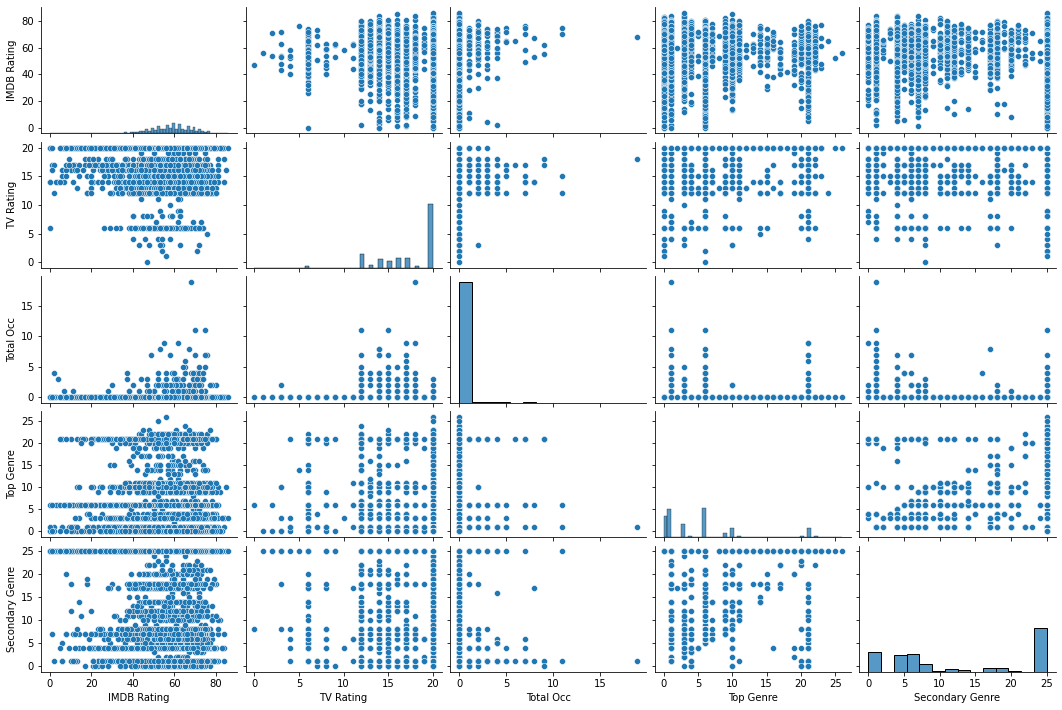

In [7]:
sns.pairplot(df, height=2, aspect=1.5)
plt.savefig('pariplot.png');

In [8]:
X = df[['TV Rating', 'Total Occ', 'Top Genre', 'Secondary Genre']]
y = df['IMDB Rating']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

In [10]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
Y_pred = lr.predict(X_test)
acc_log = round(lr.score(X_train, y_train) * 100, 2)
acc_log

C:\Users\SIU855580621\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


4.57

In [11]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

9.65

In [12]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

5.16

In [13]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

C:\Users\SIU855580621\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.0

In [14]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

1.21

In [15]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

3.38

In [16]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

3.63

In [17]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

17.31

In [18]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

17.31

In [19]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,17.31
8,Decision Tree,17.31
1,KNN,9.65
0,Support Vector Machines,5.16
2,Logistic Regression,4.57
5,Perceptron,3.63
6,Stochastic Gradient Decent,3.38
4,Naive Bayes,1.21
7,Linear SVC,0.00
